In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [192]:
df=pd.read_csv('Train.csv')
dft=pd.read_csv('Test.csv')
vt=dft.values
v=df.values

In [193]:
x=v[:,:-1]
y=v[:,-1:]
x_test=vt[:,:-1]
y_test=vt[:,-1:]
print("Number of feature of data set is",x.shape[1])

Number of feature of data set is 5


In [194]:
X=(x-x.mean())/x.std()
X_test=(x_test-x_test.mean())/x_test.std()
Y =y
Y_test=y_test
X=np.insert(X,0,1,axis=1)
X_test=np.insert(X_test,0,1,axis=1)
X.shape

(1600, 6)

# Using Gradient Desent

In [195]:
def hypothesis(X, theta):
    return  np.dot(X,theta.T)
def cost(X,Y,theta):
    m=X.shape[0]
    hp=hypothesis(X,theta)
    c=(hp-Y)**2
    return np.sum(c)/(2*m)
def gradient_desent(X,Y , learning_rate=0.01):
    theta=np.zeros((1,X.shape[1]))
    m=X.shape[0]
    cost_list= np.zeros(1000)
    for i in range(1000):
        hp=hypothesis(X,theta)
        theta = theta - (learning_rate/m) * (np.dot(X.T,(hp - Y))).T
        cost_list[i] = cost(X, Y, theta)
    return theta, cost_list


# Using Batch gradient desent

In [196]:
def stochasticgrad(x,theta,y):
    grad_thetas=np.zeros(theta.shape)
    grad_bias=0.0
    hx=hypothesis(x,theta)
    grad_thetas+=(y-hx)*x
    return grad_thetas
def batchgradient(x,y,theta,batchsize=1000,learning_rate=0.001):
    grad_w=np.zeros(theta.shape)
    a=grad_w
    
    m=x.shape[0]
    
    error_list=[]
    for j in range(400):
        
        indices=np.arange(m)
        np.random.shuffle(indices)
        array=indices[:batchsize]

        cos=0
        for i in array:
            
            h=hypothesis(x[i],theta)
            grad_w=stochasticgrad(x[i],theta,y[i])
            a+=grad_w

            cos+=cost(x[i],y[i],theta)
        a/=batchsize
        
        theta=theta+learning_rate*a
     
        error_list.append(cos/batchsize)
    return error_list,theta

In [197]:
final_theta , cost_list= gradient_desent(X,Y)
final_cost=cost(X,Y,final_theta)

In [198]:
hp=hypothesis(X,final_theta)
print("final hypothesis is",np.sum(hp))

final hypothesis is 509.200570463


In [199]:
print(final_cost)

207.776673737


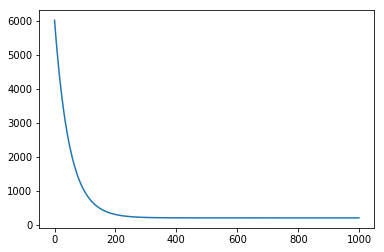

In [200]:
plt.plot(cost_list)
plt.show()

In [201]:
final_theta

array([[  1.49074643,  29.8408354 ,  93.16196034,   8.32269365,
         45.00820867,   2.53129205]])

In [202]:
t=np.zeros((1,X.shape[1]))
bcost_list,bfinal_theta=batchgradient(X,Y,t,batchsize=64,learning_rate=0.01)
bfinal_theta

array([[  1.25792236,  29.41734835,  91.38500463,   7.96037096,
         44.07350709,   2.21885545]])

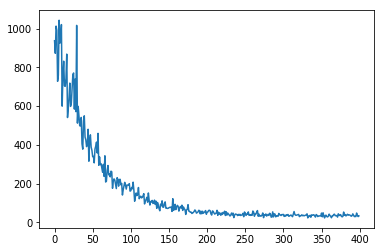

In [203]:
plt.plot(bcost_list)
plt.show()

In [204]:
print("coefficients of theta-",final_theta[0,1:])
print("intercept of theta-",final_theta[0,0])
print("hypothesis function",hypothesis(X,final_theta))

coefficients of theta- [ 29.8408354   93.16196034   8.32269365  45.00820867   2.53129205]
intercept of theta- 1.49074642538
hypothesis function [[ -57.87084727]
 [ -89.45473064]
 [  53.95018198]
 ..., 
 [-115.65900246]
 [ -64.27841029]
 [-116.10771024]]


In [205]:
def Coefficient_of_Determination(Y,X,final_theta):
    Y_predict=hypothesis(X, final_theta)
    m=X.shape[0]
    re=np.sum((Y-Y_predict)**2)
    sre=np.sum((Y-Y.mean())**2)
    r= 1- (re/sre)
    return r

Score of gradient desent

In [206]:
r= Coefficient_of_Determination(Y,X,final_theta)
print("score using Traning data",r)
rt=Coefficient_of_Determination(Y_test,X_test,final_theta)
print("score using Test data",rt)

score using Traning data 0.966093964393
score using Test data 0.968528055101


In [207]:
print("score of test data is better")
Y_predict=hypothesis(X_test, final_theta)
print(Y_predict) 

score of test data is better
[[ -8.61204418e+01]
 [ -1.63939206e+01]
 [ -6.73801809e+01]
 [ -2.41157407e+02]
 [ -2.85455633e+01]
 [ -1.77447216e+02]
 [ -1.58110724e+02]
 [  1.89121515e+01]
 [ -1.03163108e+01]
 [ -6.25798862e+01]
 [  1.06234502e+02]
 [  2.04391380e+01]
 [  1.60808023e+02]
 [ -9.51495587e+01]
 [  4.70567821e+01]
 [  3.26618048e+01]
 [  1.31868001e+02]
 [  1.09515652e+02]
 [  4.48100255e+01]
 [  2.84382460e+01]
 [  6.57859600e+01]
 [  3.47991490e+01]
 [  6.44101023e+01]
 [ -8.39576588e+01]
 [  1.16581742e+02]
 [  2.24322221e+01]
 [ -3.42734742e+01]
 [  1.32627402e+02]
 [ -4.63831110e+01]
 [  1.35682036e+02]
 [  4.36488179e+01]
 [ -2.57562679e+01]
 [ -1.65610316e+02]
 [ -1.22393713e+02]
 [ -9.07488768e+01]
 [ -5.05792262e+01]
 [ -5.41094621e+01]
 [  7.23442844e+01]
 [ -1.18889050e+02]
 [ -1.68184211e+00]
 [  1.69436558e+02]
 [ -8.46431249e+01]
 [ -1.24871711e+02]
 [  3.75477114e+01]
 [ -6.39047026e+01]
 [  7.88172392e+01]
 [  1.04529570e+02]
 [  1.30215197e+02]
 [ -1.28141

score using batch gradient desent

In [208]:
br= Coefficient_of_Determination(Y,X,bfinal_theta)
print("score using Traning data",br)
brt=Coefficient_of_Determination(Y_test,X_test,bfinal_theta)
print("score using Test data",brt)

score using Traning data 0.965726043675
score using Test data 0.96818356129


In [209]:
print("score of test data is better")
bY_predict=hypothesis(X_test, bfinal_theta)
print(bY_predict) 

score of test data is better
[[ -8.47526553e+01]
 [ -1.64142022e+01]
 [ -6.61313047e+01]
 [ -2.36814963e+02]
 [ -2.82468818e+01]
 [ -1.74564689e+02]
 [ -1.54877582e+02]
 [  1.90668013e+01]
 [ -1.03600316e+01]
 [ -6.20450483e+01]
 [  1.04526139e+02]
 [  1.99947992e+01]
 [  1.57777060e+02]
 [ -9.36309000e+01]
 [  4.61907840e+01]
 [  3.18879886e+01]
 [  1.29166487e+02]
 [  1.06677445e+02]
 [  4.35619408e+01]
 [  2.77140224e+01]
 [  6.40163789e+01]
 [  3.37055586e+01]
 [  6.31175195e+01]
 [ -8.25681644e+01]
 [  1.14008131e+02]
 [  2.13852649e+01]
 [ -3.40094242e+01]
 [  1.30071614e+02]
 [ -4.61673898e+01]
 [  1.32251666e+02]
 [  4.26020267e+01]
 [ -2.61165810e+01]
 [ -1.62998437e+02]
 [ -1.19619231e+02]
 [ -8.95407733e+01]
 [ -4.91576251e+01]
 [ -5.36855211e+01]
 [  7.00879214e+01]
 [ -1.17059450e+02]
 [ -1.99516088e+00]
 [  1.66158360e+02]
 [ -8.31972357e+01]
 [ -1.22573641e+02]
 [  3.68376073e+01]
 [ -6.25633653e+01]
 [  7.64302941e+01]
 [  1.02466413e+02]
 [  1.27041794e+02]
 [ -1.30181